In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import os
from tqdm.notebook import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('data/train_df.csv')
test = pd.read_csv('data/final dataset/test_df.csv')

In [3]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14004 entries, 0 to 14003
Data columns (total 32 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   id                                            14004 non-null  int64 
 1   ABSTRACT                                      14004 non-null  object
 2   Computer Science                              14004 non-null  int64 
 3   Mathematics                                   14004 non-null  int64 
 4   Physics                                       14004 non-null  int64 
 5   Statistics                                    14004 non-null  int64 
 6   Analysis of PDEs                              14004 non-null  int64 
 7   Applications                                  14004 non-null  int64 
 8   Artificial Intelligence                       14004 non-null  int64 
 9   Astrophysics of Galaxies                      14004 non-null  int64 
 10

In [4]:
## dropped multilabeled columns
cols = ['ABSTRACT', 'Analysis of PDEs', 'Applications',
       'Artificial Intelligence', 'Astrophysics of Galaxies',
       'Computation and Language', 'Computer Vision and Pattern Recognition',
       'Cosmology and Nongalactic Astrophysics',
       'Data Structures and Algorithms', 'Differential Geometry',
       'Earth and Planetary Astrophysics', 'Fluid Dynamics',
       'Information Theory', 'Instrumentation and Methods for Astrophysics',
       'Machine Learning', 'Materials Science', 'Methodology', 'Number Theory',
       'Optimization and Control', 'Representation Theory', 'Robotics',
       'Social and Information Networks', 'Statistics Theory',
       'Strongly Correlated Electrons', 'Superconductivity',
       'Systems and Control','id']
train = train.drop(columns = cols)
test = test.drop(['id', 'ABSTRACT'], axis=1)
train.head()


,Computer Science,Mathematics,Physics,Statistics,cleaned_text
0,0,0,1,0,evergrowing datasets inside observational astr...
1,1,0,0,0,propose framework consider optimal tmatchings ...
2,0,0,1,0,nanostructures open shell transition metal mol...
3,0,0,1,0,star selfgravitating fluid inside pressure buo...
4,1,0,0,0,deep neural perception control network likely ...


In [5]:
print('Shape of Training data {}'.format(train.shape))
print('Shape of Testing data {}'.format(test.shape))


Shape of Training data (14004, 5)
Shape of Testing data (6002, 5)


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14004 entries, 0 to 14003
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Computer Science  14004 non-null  int64 
 1   Mathematics       14004 non-null  int64 
 2   Physics           14004 non-null  int64 
 3   Statistics        14004 non-null  int64 
 4   cleaned_text      14004 non-null  object
dtypes: int64(4), object(1)
memory usage: 547.2+ KB


In [7]:
vect =TfidfVectorizer(max_features=1000) # to play with. min_df,max_df,max_features etc...
vect_text=vect.fit_transform(train['cleaned_text'])

In [9]:
idf=vect.idf_

In [17]:
from sklearn.decomposition import TruncatedSVD
lsa_model = TruncatedSVD(n_components=25, algorithm='randomized', n_iter=100, random_state=42)

lsa_top=lsa_model.fit_transform(vect_text)

In [18]:
l=lsa_top[0]
print("Document 0 :")
for i,topic in enumerate(l):
  print("Topic ",i," : ",topic*100)

Document 0 :
Topic  0  :  35.93965721357018
Topic  1  :  -0.7659986977702136
Topic  2  :  -9.467735932751498
Topic  3  :  14.76813393777249
Topic  4  :  3.8840293864845563
Topic  5  :  -9.63591354302341
Topic  6  :  9.423724814412997
Topic  7  :  12.83285747896637
Topic  8  :  -9.351712763374122
Topic  9  :  10.757591744737217
Topic  10  :  6.709962637200946
Topic  11  :  -4.077612068964198
Topic  12  :  4.133021691752674
Topic  13  :  -0.684670512507412
Topic  14  :  2.9940216975134266
Topic  15  :  -7.231346920971003
Topic  16  :  -17.03005934545242
Topic  17  :  2.409294972562141
Topic  18  :  1.5559374400045909
Topic  19  :  1.361022252674725
Topic  20  :  9.93928279231797
Topic  21  :  8.268976920327198
Topic  22  :  1.5428039193778786
Topic  23  :  -2.142446333793014
Topic  24  :  -6.4729505763081345


In [19]:
# most important words for each topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
inside consider model method network data learn problem propose system 

Topic 1: 
magnetic inside phase field temperature spin state transition galaxy quantum 

Topic 2: 
problem algorithm solution function equation bound prove consider give optimization 

Topic 3: 
galaxy mass star cluster data stellar planet distribution redshift survey 

Topic 4: 
network neural graph group node image deep galaxy prove convolutional 

Topic 5: 
model data distribution estimator inference parameter sample bayesian approximation graph 

Topic 6: 
model group image representation space manifold equation algebra prove object 

Topic 7: 
image method magnetic algorithm data sample field phase idea behind 

Topic 8: 
learn agent policy task graph galaxy group reinforcement algorithm representation 

Topic 9: 
graph group user system data node social cluster inside information 

Topic 10: 
image model algorithm graph problem solution time bound object equation 

Topic 11: 
graph method cluster m

In [21]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1) 
lda_top=lda_model.fit_transform(vect_text)

In [22]:
sum=0
for i in lda_top[0]:
  sum=sum+i
print(sum) 

1.0


In [23]:
# composition of doc 0 for eg
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  0.4772851588757527 %
Topic  1 :  0.47728515953042894 %
Topic  2 :  0.47728515899786284 %
Topic  3 :  0.4772851588757527 %
Topic  4 :  0.4772851588819443 %
Topic  5 :  0.4772851588757527 %
Topic  6 :  0.47728515897205714 %
Topic  7 :  0.47728515896566726 %
Topic  8 :  3.0859513293234873 %
Topic  9 :  0.47728515907708036 %
Topic  10 :  0.4772851588757527 %
Topic  11 :  0.47728515887879314 %
Topic  12 :  0.4772851598696358 %
Topic  13 :  0.47728515887679424 %
Topic  14 :  85.93649001420839 %
Topic  15 :  0.47728515896685264 %
Topic  16 :  0.4772851588757527 %
Topic  17 :  0.4772851588757534 %
Topic  18 :  0.4772851588757531 %
Topic  19 :  0.4772851589008657 %
Topic  20 :  0.4772851588757527 %
Topic  21 :  0.4772851588757527 %
Topic  22 :  0.4772851588757527 %
Topic  23 :  0.4772851589168724 %
Topic  24 :  0.4772851588757527 %


In [24]:
# most important words for each topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
film inverse light transit intrinsic image deep regularization adaptive curve 

Topic 1: 
tree polynomial query formula rule regard operator hold differential associate 

Topic 2: 
network learn inside neural model method image train deep consider 

Topic 3: 
graph vertex edge discrete produce controller spectral module series remain 

Topic 4: 
answer question visual scene object image region attention pose dataset 

Topic 5: 
agent policy game reward reinforcement action equilibrium environment learn expert 

Topic 6: 
inside consider problem algorithm method model function propose result data 

Topic 7: 
inside magnetic phase state temperature consider spin field quantum transition 

Topic 8: 
dark matter cosmological galaxy redshift mass inside spectrum energy detector 

Topic 9: 
3d reconstruction image depth object pose 2d camera shape scene 

Topic 10: 
fluid mode magnetic star pressure field core size activity complex 

Topic 11: 
monte carlo solar science discovery t

In [25]:
from wordcloud import WordCloud
# Generate a word cloud image for given topic
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lda_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()
 

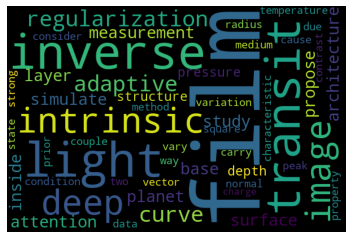

In [26]:
# topic 0
draw_word_cloud(0)

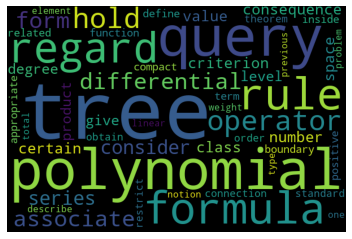

In [27]:
# topic 1
draw_word_cloud(1)